In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("D:/DS ML&AI/Capstone4/env/Scripts/RFM.csv")
df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4333,18280.0,278,1,180.60
4334,18281.0,181,1,80.82
4335,18282.0,8,2,178.05
4336,18283.0,4,16,2045.53


In [7]:
#df = df.drop(columns=["CustomerID"], errors="ignore")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4338 non-null   float64
 1   Recency     4338 non-null   int64  
 2   Frequency   4338 non-null   int64  
 3   Monetary    4338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X = df.select_dtypes(include=['float64', 'int64'])
X=df[['Recency','Frequency','Monetary']]
X_scaled = scaler.fit_transform(X)

In [5]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [6]:
scaled_df

,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.363010
1,-0.905340,0.354417,0.251699
2,-0.175360,-0.035340,-0.027988
3,-0.735345,-0.425097,-0.032406
4,2.174578,-0.425097,-0.190812
...,...,...,...
4333,1.854587,-0.425097,-0.207931
4334,0.884612,-0.425097,-0.219037
4335,-0.845342,-0.295178,-0.208214
4336,-0.885341,1.523687,-0.000352


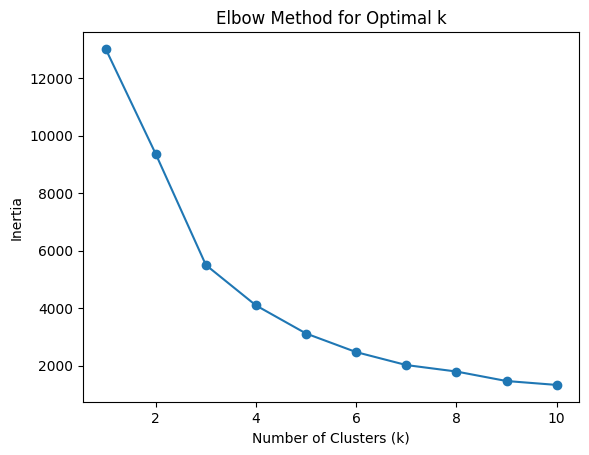

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

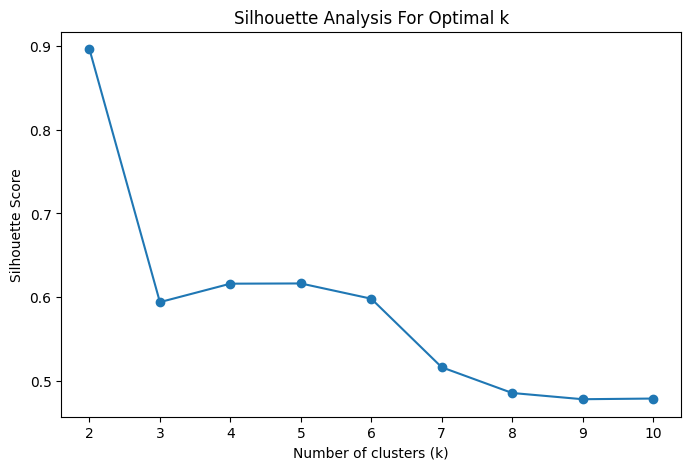

Best k based on silhouette score: 2


In [8]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
K = range(2, 11)  # silhouette is undefined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

# Print best k
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k based on silhouette score: {best_k}")

In [9]:
# Apply K-Means clustering 
from sklearn.metrics import silhouette_score
k_val = 5
kmeans = KMeans(n_clusters=k_val, random_state=10)
df["Cluster"] = kmeans.fit_predict(scaled_df)
sil_score = silhouette_score(scaled_df, df["Cluster"])


In [16]:
sil_score

0.5995294297976316

In [10]:
#create a ppipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X=df[['Recency','Frequency','Monetary']]

In [21]:
X

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,7,4310.00
2,75,4,1797.24
3,19,1,1757.55
4,310,1,334.40
...,...,...,...
4333,278,1,180.60
4334,181,1,80.82
4335,8,2,178.05
4336,4,16,2045.53


In [11]:
from sklearn.pipeline import Pipeline
k_val = 5
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k_val, random_state=10, n_init=10))
])

# Fit pipeline
pipe.fit(X)
df["Cluster"] = pipe.predict(X)

In [12]:
#save the pipeline
import pickle
with open("rfm_kmeans_pipeline.pkl", "wb") as f:
    pickle.dump(pipe, f)

In [13]:
clust_no=[0,1,2,3,4]
for clt in clust_no:
    clustor_points=df[df['Cluster']==clt]    
    print(f"no of point in cluster {clt}:{(len(clustor_points))}")

no of point in cluster 0:3048
no of point in cluster 1:1063
no of point in cluster 2:6
no of point in cluster 3:213
no of point in cluster 4:8


In [14]:
df


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
4333,18280.0,278,1,180.60,1
4334,18281.0,181,1,80.82,1
4335,18282.0,8,2,178.05,0
4336,18283.0,4,16,2045.53,3


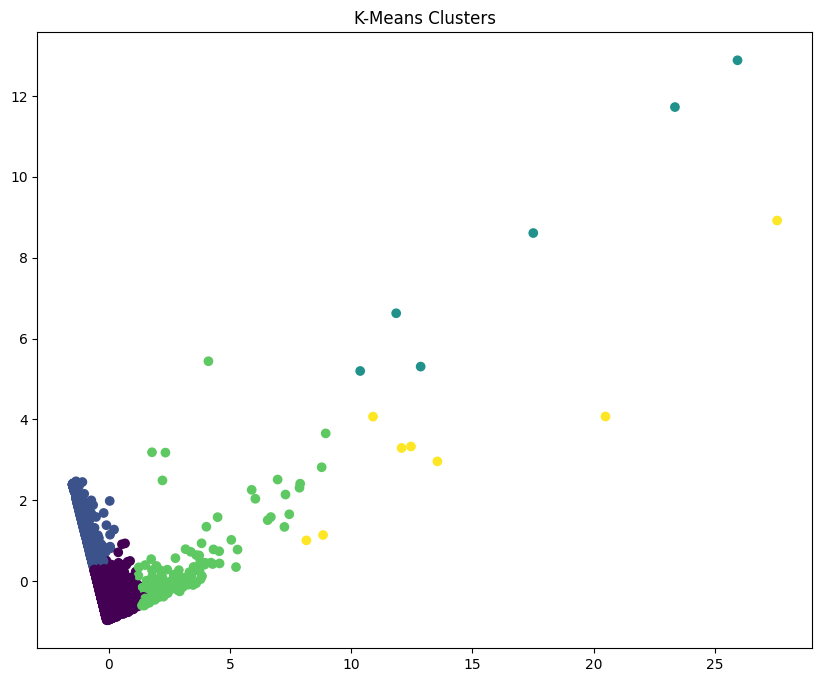

In [15]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [16]:
df.to_csv("clustered_RFM.csv",index=False)

In [17]:
df

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
4333,18280.0,278,1,180.60,1
4334,18281.0,181,1,80.82,1
4335,18282.0,8,2,178.05,0
4336,18283.0,4,16,2045.53,3


In [18]:
with open("rfm_kmeans_pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

In [19]:
# Example new customer [Recency, Frequency, Monetary]
new_customer = pd.DataFrame([[12, 22, 16500]],
                            columns=["Recency", "Frequency", "Monetary"])

# Predict cluster directly
predicted_cluster = loaded_pipeline.predict(new_customer)
print(f"Predicted Cluster: {predicted_cluster[0]}")

Predicted Cluster: 3


In [20]:
#RFM averages
cluster_summary = df.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean"
}).round(2)

cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,43.92,3.65,1333.13
1,248.47,1.55,478.65
2,7.67,42.83,190808.54
3,15.67,21.29,12813.94
4,6.50,120.50,55099.49


Cluster 0: Regular(Medium R,Medium F, Medium M)
Cluster 1: At Risk(High R, Low F, Low M)
Cluster 2: Supreme Value(most Recent, High F, Very High M)
Cluster 3: Occasional (Low F, Low M, older R)
Cluster 4: High Value(High R, High F, High M)
